# Implementation of ANN using Keras

In [1]:
#pip install tensorflow

In [2]:
#pip install keras

In [3]:
# importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow import keras

In [4]:
# Checking versions of Tensorflow and Keras

import tensorflow as tf

print(f"TensorFlow version {tf.__version__}")
print(f"Keras version {tf.keras.__version__}")


TensorFlow version 2.15.0


AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'

In [5]:
#pip install --upgrade tensorflow

In [6]:
os.getcwd() # to get the current workspace directory

'/content'

# GPU / CPU Check

In [7]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [9]:
check_list = ['GPU', 'CPU']

for device in check_list :
  out = tf.config.list_physical_devices(device)

  if len(out) > 0 :
    print(f"{device} is available")
    print(f"Details >> {out}")

  else :
    print(f"{device} is not available!")


GPU is available
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [10]:
# google colab lend GPU. so for using GPU, we can enable GPU service by go to runtime, change runtime type, hardware accelarator GPU, then save then restart codes.

# Creating a simple classifier using keras on MNIST data

In [11]:
mnist = tf.keras.datasets.mnist

In [12]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [13]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


### mnist data is consists of some hand written number types from 0 to 9

In [14]:
X_train_full.shape # 6000 data, and the 28,28 means every image is 28 by 28 matrix

(60000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
X_train_full[0] # matrix of first image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
X_train_full[0].shape

(28, 28)

In [18]:
print(f"data type of X_train full: {X_train_full.dtype}, \nshape of X_train_full: {X_train_full.shape}")

data type of X_train full: uint8, 
shape of X_train_full: (60000, 28, 28)


In [19]:
# create a validation data set form the full training data
# scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


# scale the test set as well
X_test = X_test / 255.

In [20]:
# TRAIN - 55000
# TEST - 10000
# VAL - 5000

In [21]:
len(X_train_full[5000:])

55000

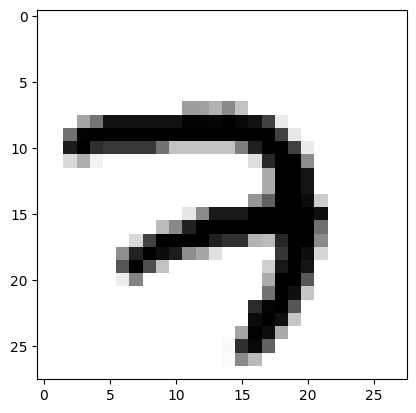

In [22]:
# lets view some data

plt.imshow(X_train[0], cmap='binary')
plt.show()

<Axes: >

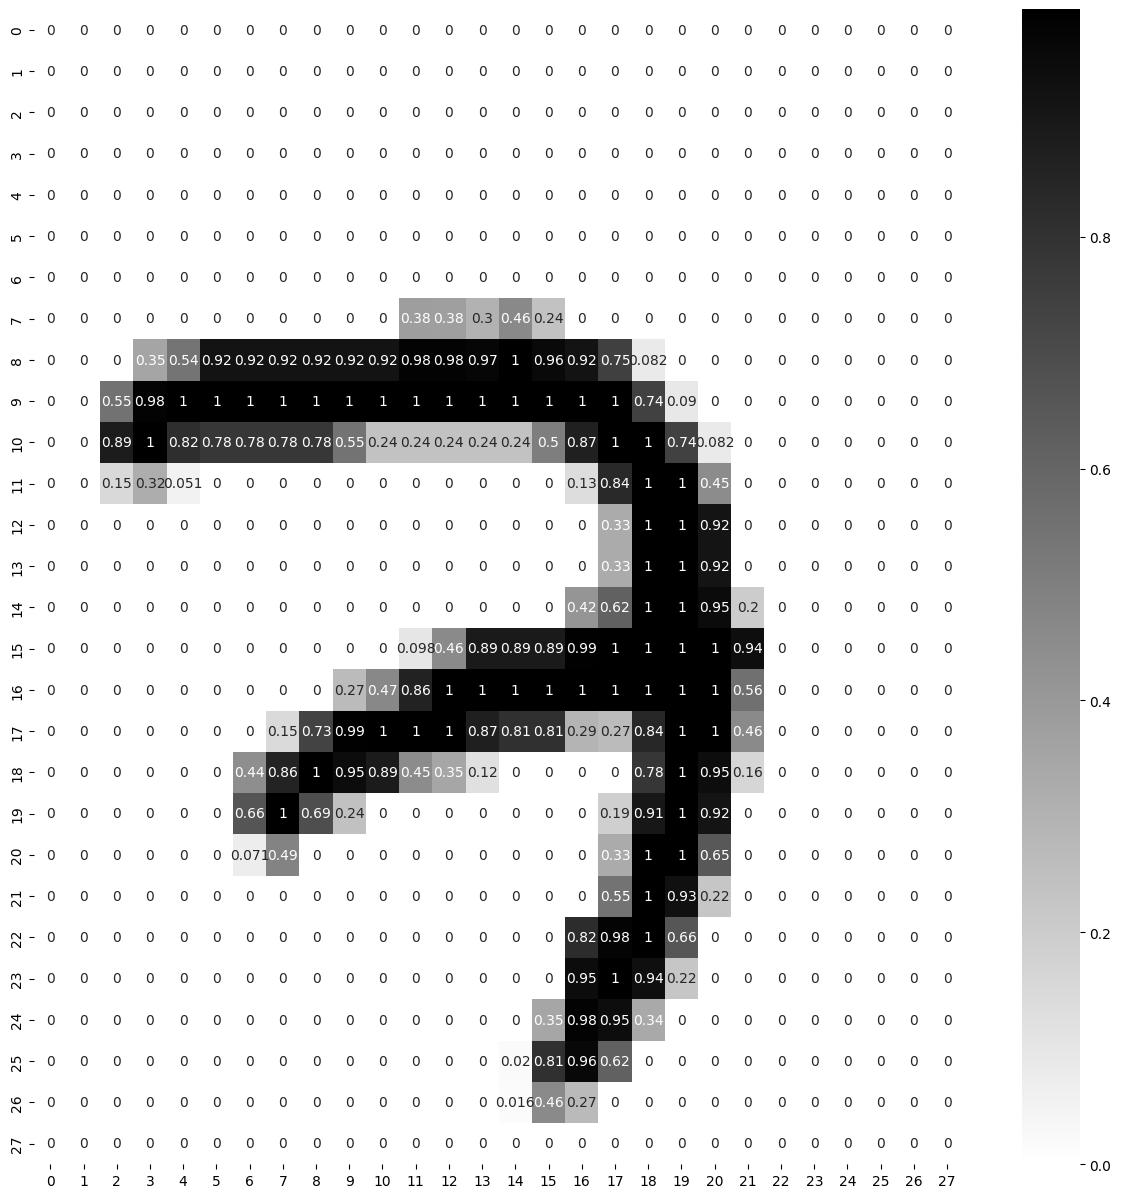

In [23]:
# now we will see how machine sees this image

plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap='binary')

In [24]:
# Creating layers of ANN

LAYERS =  [tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
           tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
           tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
           tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [25]:
# Method 2

# from keras.models import Sequential
# from keras.layers import Dense, Flatten

## define the model

# model = Sequential()
# model.add(Dense(units=64, activation= 'relu', input_dim=100))
# model.add(Dense(units=10, activation= 'softmax'))

In [26]:
model_clf.layers

In [27]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# first_layers * second_layers + bias

(784 * 300 +300), (300 * 100 + 100), (100 * 10 + 10)

(235500, 30100, 1010)

In [29]:
# total parameters to be trained
sum((235500, 30100, 1010))

266610

In [30]:
hidden1 = model_clf.layers[0]
hidden1.name

'inputLayer'

In [31]:
hidden2 = model_clf.layers[1]
hidden2.name

'hiddenLayer1'

In [32]:
hidden3 = model_clf.layers[2]
hidden3.name

'hiddenLayer2'

In [33]:
hidden4 = model_clf.layers[3]
hidden4.name

'outputLayer'

In [34]:
hidden2.get_weights()

[array([[ 0.05558936,  0.03042281, -0.00303833, ..., -0.02421398,
         -0.04622699, -0.0062962 ],
        [-0.04706154,  0.01981875,  0.03280644, ...,  0.01944828,
          0.05938002, -0.06740888],
        [-0.0341376 , -0.07095209, -0.01522461, ...,  0.05235802,
          0.01961138, -0.014443  ],
        ...,
        [ 0.05780163,  0.02128926,  0.06123658, ..., -0.05006742,
         -0.04145196, -0.05629816],
        [ 0.02638187,  0.03675083,  0.01595442, ...,  0.07004941,
          0.00699283, -0.03882037],
        [-0.02673886,  0.06001768, -0.02040423, ..., -0.0390937 ,
          0.0041386 ,  0.05686931]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [35]:
hidden2.get_weights()[0].shape

(784, 300)

In [36]:
hidden2.get_weights()[1].shape

(300,)

In [37]:
weights, biases = hidden2.get_weights()

In [38]:
weights.shape

(784, 300)

In [39]:
print("Shape\n", weights.shape, "\n")
weights

Shape
 (784, 300) 



array([[ 0.05558936,  0.03042281, -0.00303833, ..., -0.02421398,
        -0.04622699, -0.0062962 ],
       [-0.04706154,  0.01981875,  0.03280644, ...,  0.01944828,
         0.05938002, -0.06740888],
       [-0.0341376 , -0.07095209, -0.01522461, ...,  0.05235802,
         0.01961138, -0.014443  ],
       ...,
       [ 0.05780163,  0.02128926,  0.06123658, ..., -0.05006742,
        -0.04145196, -0.05629816],
       [ 0.02638187,  0.03675083,  0.01595442, ...,  0.07004941,
         0.00699283, -0.03882037],
       [-0.02673886,  0.06001768, -0.02040423, ..., -0.0390937 ,
         0.0041386 ,  0.05686931]], dtype=float32)

In [40]:
print("shape\n", biases.shape)
biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [41]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use -> tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate  -> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss = LOSS_FUNCTION,
                  optimizer = OPTIMIZER,
                  metrics = METRICS)


In [42]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs = EPOCHS,
                        validation_data = VALIDATION_SET, batch_size = 12)

Epoch 1/30
4584/4584 [==============================] - 16s 3ms/step - loss: 0.4192 - accuracy: 0.8844 - val_loss: 0.2549 - val_accuracy: 0.9282
Epoch 2/30
4584/4584 [==============================] - 14s 3ms/step - loss: 0.2069 - accuracy: 0.9404 - val_loss: 0.1719 - val_accuracy: 0.9538
Epoch 3/30
4584/4584 [==============================] - 15s 3ms/step - loss: 0.1510 - accuracy: 0.9565 - val_loss: 0.1307 - val_accuracy: 0.9648
Epoch 4/30
4584/4584 [==============================] - 14s 3ms/step - loss: 0.1182 - accuracy: 0.9657 - val_loss: 0.1057 - val_accuracy: 0.9702
Epoch 5/30
4584/4584 [==============================] - 15s 3ms/step - loss: 0.0961 - accuracy: 0.9720 - val_loss: 0.0945 - val_accuracy: 0.9732
Epoch 6/30
4584/4584 [==============================] - 15s 3ms/step - loss: 0.0799 - accuracy: 0.9770 - val_loss: 0.0888 - val_accuracy: 0.9748
Epoch 7/30
4584/4584 [==============================] - 15s 3ms/step - loss: 0.0680 - accuracy: 0.9807 - val_loss: 0.0839 - val_ac

In [43]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 4584}

In [44]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.419156,0.884364,0.254937,0.9282
1,0.206941,0.940400,0.171879,0.9538
2,0.150972,0.956473,0.130697,0.9648
3,0.118176,0.965745,0.105743,0.9702
4,0.096104,0.972018,0.094485,0.9732
5,0.079884,0.977000,0.088842,0.9748
6,0.067988,0.980691,0.083893,0.9752
7,0.058742,0.983200,0.082479,0.9764
8,0.050986,0.985691,0.074901,0.9792
9,0.044530,0.988000,0.073155,0.9782


<Axes: >

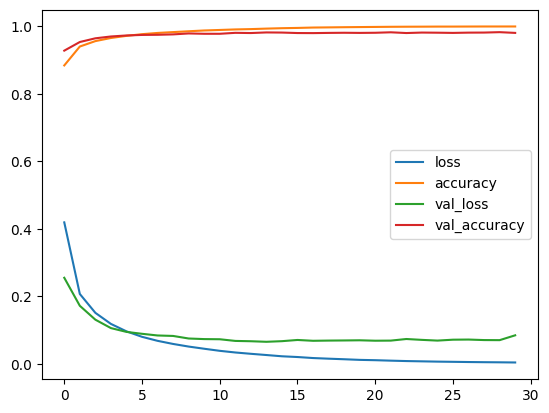

In [45]:
pd.DataFrame(history.history).plot()

In [46]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0782 - accuracy: 0.9790


[0.07817143201828003, 0.9789999723434448]

### SAMPLE CHECK FOR TEST DATA

In [47]:
X_new = X_test[:3]

In [48]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

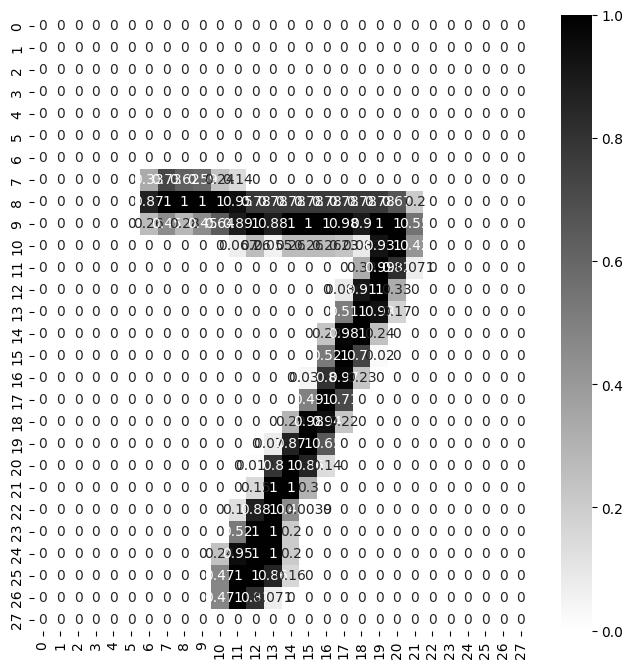

In [49]:
plt.figure(figsize = (8,8))
sns.heatmap(X_test[0], annot = True, cmap = 'binary')

<Axes: >

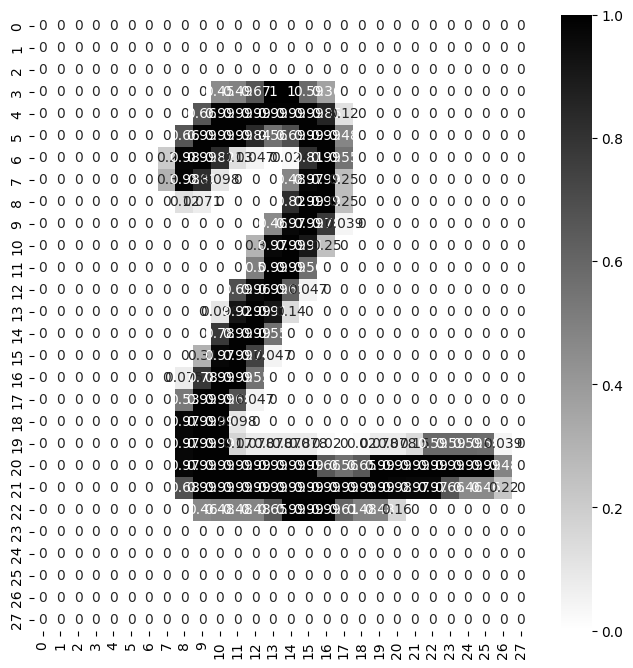

In [50]:
plt.figure(figsize = (8,8))
sns.heatmap(X_test[1], annot = True, cmap = 'binary')

<Axes: >

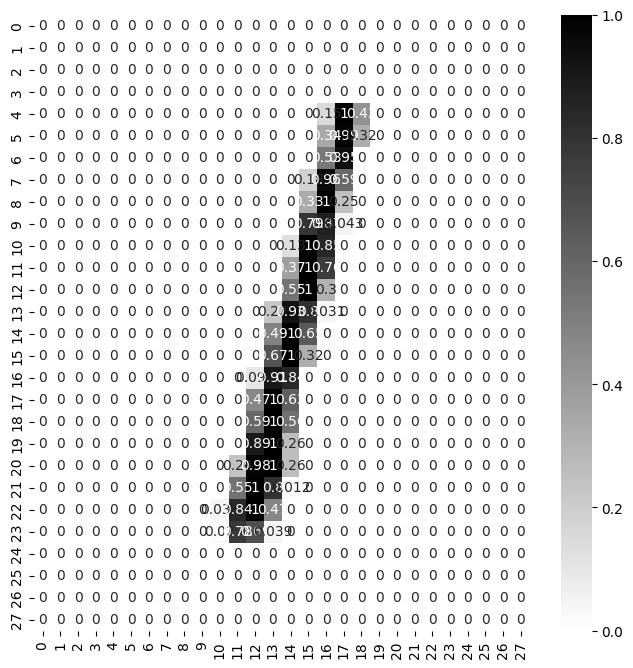

In [51]:
plt.figure(figsize = (8,8))
sns.heatmap(X_test[2], annot = True, cmap = 'binary')

In [52]:
y_prob = model_clf.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 71ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [53]:
y_prob

array([[3.1932601e-08, 4.5671222e-09, 6.6204416e-07, 5.5084579e-06,
        4.6161017e-10, 2.0519775e-09, 4.5704221e-14, 9.9997652e-01,
        5.9583805e-08, 1.7167215e-05],
       [2.9751901e-10, 1.7424313e-06, 9.9999809e-01, 1.2371457e-07,
        5.4339244e-18, 9.4079388e-12, 7.0570924e-11, 5.9397762e-15,
        2.7406917e-09, 2.1060475e-17],
       [8.4735390e-08, 9.9989974e-01, 3.8262283e-06, 5.4108546e-07,
        1.3399117e-05, 1.4711433e-07, 9.9413810e-06, 4.2386448e-05,
        2.9826573e-05, 2.8256295e-08]], dtype=float32)

In [54]:
y_pred = np.argmax(y_prob, axis = -1)

In [55]:
y_pred

array([7, 2, 1])

In [56]:
actual

array([7, 2, 1], dtype=uint8)

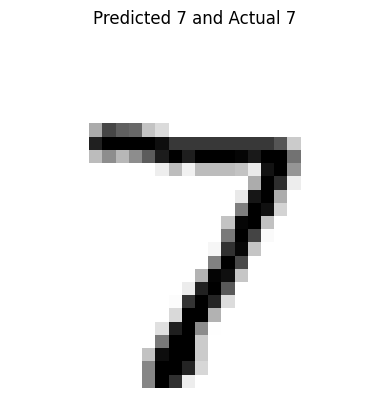

##################


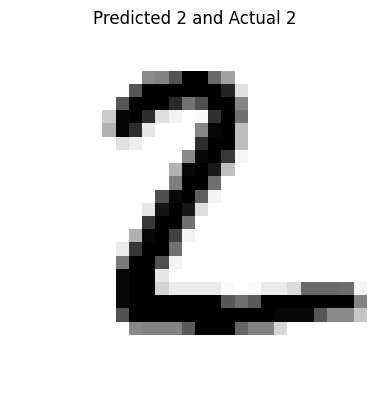

##################


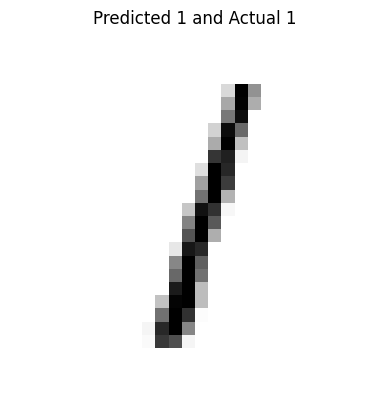

##################


In [57]:
# plotting

for data, pred, actual_data in zip(X_new, y_pred, actual) :
  plt.imshow(data, cmap = 'binary')
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("##################")